In [1]:
from fastai.vision.all import *

set_seed(333)

In [2]:
path = untar_data(URLs.MNIST)
training_path = path/'training'
training_path.ls()

In [58]:
# Get image files
image_files = get_image_files(training_path).sorted().shuffle()

## High-Level Model

### Training

In [49]:
# Define label function
# Assumes that x is a Path object
def get_num(x): return x.parent.name

In [50]:
# Create data loader and learner
dls = ImageDataLoaders.from_path_func( # use from_path_func for get_num to work
    training_path, image_files, valid_pct=0.2, seed=42,
    label_func=get_num, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet18, metrics=error_rate)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, TensorCategory(0, device='cuda:0'))

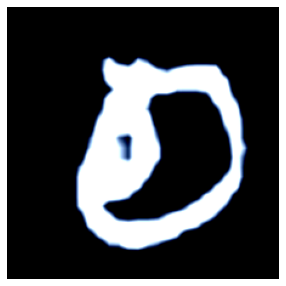

In [55]:
# Check one batch
images, labels = dls.train.one_batch()
show_image(images[0]), labels[0]

In [56]:
# Train learner over one epoch
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.160227,0.089651,0.029000,04:51


epoch,train_loss,valid_loss,error_rate,time
0,0.029860,0.019597,0.005167,06:26


### Analysis

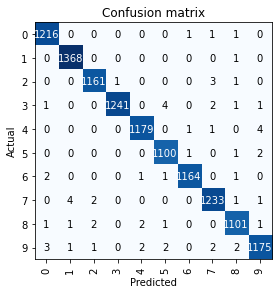

In [57]:
# Plot confusion matrix and top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
# interp.plot_top_losses(10)

## Low-Level Model

### Training

### Analysis